In [16]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [43]:
dat_trn = pd.read_csv('data/trn_all.csv').values
dat_tst = pd.read_csv('data/tst_all.csv').values
dat_trn2 = pd.read_csv('data/trn_pca2.csv').values
dat_tst2 = pd.read_csv('data/tst_pca2.csv').values
dat_trn10 = pd.read_csv('data/trn_pca10.csv').values
dat_tst10 = pd.read_csv('data/tst_pca10.csv').values

y_tst = pd.read_csv('data/tst_labs.csv').values[:,0]
y_trn = pd.read_csv('data/trn_labs.csv').values[:,0]

In [40]:
clf = svm.SVC()
clf.fit(dat_trn[:75000].copy(), y_trn[:75000].copy())
pred_y_test = clf.predict(dat_tst.copy())

In [44]:
clf = svm.SVC()
clf.fit(dat_trn2[:75000].copy(), y_trn[:75000].copy())
pred_y_test = clf.predict(dat_tst2.copy())

In [45]:
acc = np.count_nonzero(pred_y_test == y_tst)/len(y_tst)
acc_0 = int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))/len(np.where(y_tst==0)[0])
acc_1 = int(np.sum(pred_y_test[np.where(y_tst==1)]))/len(np.where(y_tst==1)[0])

print(f"Acc diab:\n{int(np.sum(pred_y_test[np.where(y_tst==1)]))}/{len(np.where(y_tst==1)[0])} = {acc_1:.5f}")
print(f"Acc no diab:\n{int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))}/{len(np.where(y_tst==0)[0])} = {acc_0:.5f}")
print(f"Acc overall:\n{np.count_nonzero(pred_y_test == y_tst)}/{len(y_tst)} = {acc:.5f}")

Acc diab:
27/3490 = 0.00774
Acc no diab:
21856/21878 = 0.99899
Acc overall:
21883/25368 = 0.86262


In [46]:
len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)])

21856.0

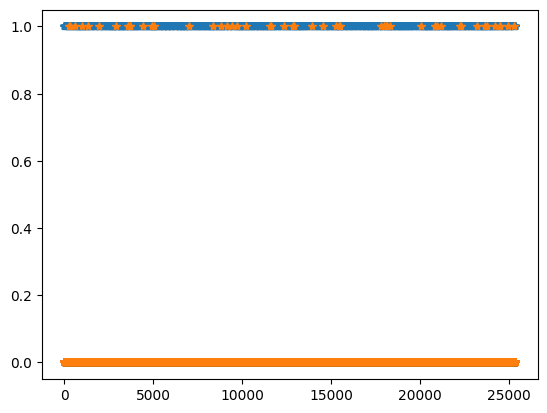

In [47]:
plt.plot(y_tst, '*')
plt.plot(pred_y_test, '*')